O presente projecto tem cmo objectivo, fazer a analise exploratoria dos dados de producao dos dos dados de producao Volve Production Data liberados pela Equinor.
O objectivo principal é de fazer demostraçao de algumas tecnicas de tratamento que um dataset deve ser anteceder antes elaboração do modelo de ML.
O objectivo secundário e fazer o modelo de ML usando Multiple Regression.
Para a elaboracao do presente estudo usou-se como apoio explições feitas por vários actores de elaborcao de modelos de ML no youtube e algumas publições desponiveis na internet.
Os dados foram adquiridos no site oficial da Equinor. 


In [1]:
import pandas as pd

In [2]:
pwd

'C:\\Users\\D\\Desktop\\Power BI data set volve\\THESIS HSE'

In [3]:
df = pd.read_excel('Volveproductiondata.xlsx')

In [4]:
df.head()

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-07,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.00000,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,WI
1,2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2,2014-04-09,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
3,2014-04-10,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
4,2014-04-11,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.37614,...,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP


# Info about the dataset

In [5]:
# procurar saber que tipo de objecto eh a nossa tabela?
type(df)

pandas.core.frame.DataFrame

In [6]:
# imprimindo os indices da tabela que correspondem aos valores da primeira coluna
df.index

RangeIndex(start=0, stop=15634, step=1)

#de acordo com resultados acima os dados apresentam 15634 linhas em inxecao cuja ontagem comeca a partir 0 em python

#saltando de uma em uma casa (step=1)

In [14]:
Antes de corrigir os missing primeiro vamos ver quantos furos temos no dataset?
well_list = df["WELL_BORE_CODE"].unique().tolist()
well_list

Object `dataset` not found.


['NO 15/9-F-1 C',
 'NO 15/9-F-11 H',
 'NO 15/9-F-12 H',
 'NO 15/9-F-14 H',
 'NO 15/9-F-15 D',
 'NO 15/9-F-4 AH',
 'NO 15/9-F-5 AH']

In [15]:
# nr de furos
well_list_number = len(well_list)
well_list_number

7

#do resultados acima eh possivel saber que temos 7 furos no dataset

Iremos de seguida observar se a distribuicao dos missings por furo?

# Panorama geral do dataset¶

In [7]:
#Info sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   15634 non-null  datetime64[ns]
 1   WELL_BORE_CODE            15634 non-null  object        
 2   NPD_WELL_BORE_CODE        15634 non-null  int64         
 3   NPD_WELL_BORE_NAME        15634 non-null  object        
 4   NPD_FIELD_CODE            15634 non-null  int64         
 5   NPD_FIELD_NAME            15634 non-null  object        
 6   NPD_FACILITY_CODE         15634 non-null  int64         
 7   NPD_FACILITY_NAME         15634 non-null  object        
 8   ON_STREAM_HRS             15349 non-null  float64       
 9   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64       
 10  AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64       
 11  AVG_DP_TUBING             8980 non-null   float64       
 12  AVG_ANNULUS_PRESS 

#apartir dos dados acima eh possivel observar que os dataset tem um total de 24colunas.

#Algumas colunas dos total de dados apresentam dados nulos.

#Os dados apresentam-se como float() object

vamos importar outras bibliotecas para a visualizacao de outra modo do dataset para o posterior tratamento destes.

In [8]:
# Importing other libraries for data visualization and prediction
%matplotlib inline 
import matplotlib.pyplot as plt # para projecao de de graficos
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None
import seaborn as sns # para projecao de alguns graficos
import numpy as np # para calculos sempres bom importar

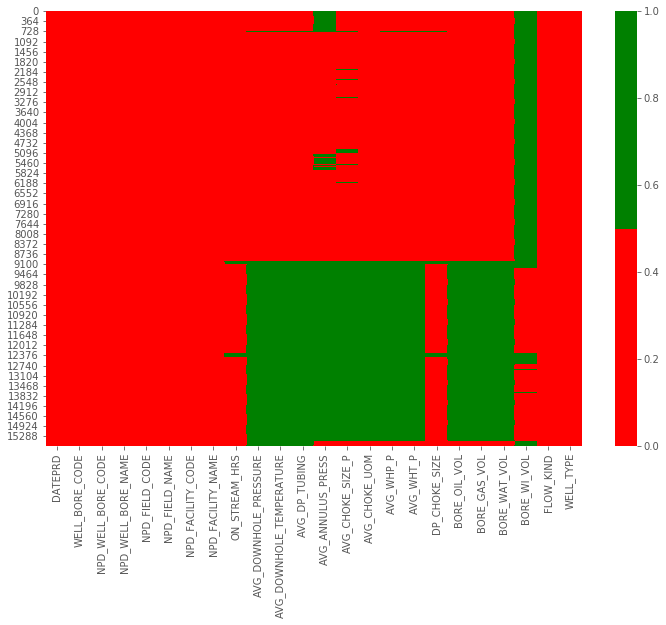

In [9]:
#observacao do dataset num heatmap este permite com possamos ver a desposicao dos dados.
cols = df.columns[:24] # para a visualizacao das 24 colunas do dataset em forma de heatmap
colours = ['r', 'g'] # a visualizacao dos dados sera desposta em cor vermelha e verde onde vermelho missing a verde existem
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

#do heatmap podemos ver a dispoicao dos missing data e dos dados que existem no panorama geral do dataset - a vermelho sao

#dados que existem a verde sao dados nao existentes.

In [11]:
#para auxiliar podemos fazer tambem a analise em forma percentual. os chefes gostam kkkk...!
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round (pct_missing*100)))

DATEPRD - 0.0%
WELL_BORE_CODE - 0.0%
NPD_WELL_BORE_CODE - 0.0%
NPD_WELL_BORE_NAME - 0.0%
NPD_FIELD_CODE - 0.0%
NPD_FIELD_NAME - 0.0%
NPD_FACILITY_CODE - 0.0%
NPD_FACILITY_NAME - 0.0%
ON_STREAM_HRS - 2.0%
AVG_DOWNHOLE_PRESSURE - 43.0%
AVG_DOWNHOLE_TEMPERATURE - 43.0%
AVG_DP_TUBING - 43.0%
AVG_ANNULUS_PRESS - 50.0%
AVG_CHOKE_SIZE_P - 43.0%
AVG_CHOKE_UOM - 41.0%
AVG_WHP_P - 41.0%
AVG_WHT_P - 41.0%
DP_CHOKE_SIZE - 2.0%
BORE_OIL_VOL - 41.0%
BORE_GAS_VOL - 41.0%
BORE_WAT_VOL - 41.0%
BORE_WI_VOL - 64.0%
FLOW_KIND - 0.0%
WELL_TYPE - 0.0%


#o resultado acima mostra a quantidade de dados nulos por coluna em forma de percentagem.

#N.B - O resultado d ln[6] mostra tambem que tipo de dados cada coluna tem e isso eh importante para as operacoes a se fazer

#Objects sao strings, float sao numeros decimais e int sao numeros inteiros.As colunas NPD_Wellbore_Code, NPD_Field_Code,

#NPD_Facility_Code, sao apenas codigos embora eles aparecem como 'int', estes nao sao usados para nemhum tipo de calculo

#pelo que devem ser tratados como 'object'('string'), logo iremos alter estas variaveis para 'object'

In [12]:
df['WELL_BORE_CODE'] = df['WELL_BORE_CODE'].astype('object')
df['NPD_WELL_BORE_CODE'] = df['NPD_WELL_BORE_CODE'].astype('object')

In [13]:
# vamos verificar se a coluna alterou mesmo:
df['WELL_BORE_CODE'].dtypes

dtype('O')

In [16]:
for i in well_list:
    well_df = pd.DataFrame(df.loc[df["WELL_BORE_CODE"] == i])
    well_df = well_df[well_df["FLOW_KIND"] == "production"]
    print("null sum of well", i)
    print(well_df.isnull().sum())

null sum of well NO 15/9-F-1 C
DATEPRD                       0
WELL_BORE_CODE                0
NPD_WELL_BORE_CODE            0
NPD_WELL_BORE_NAME            0
NPD_FIELD_CODE                0
NPD_FIELD_NAME                0
NPD_FACILITY_CODE             0
NPD_FACILITY_NAME             0
ON_STREAM_HRS                 0
AVG_DOWNHOLE_PRESSURE         3
AVG_DOWNHOLE_TEMPERATURE      3
AVG_DP_TUBING                 3
AVG_ANNULUS_PRESS           729
AVG_CHOKE_SIZE_P              0
AVG_CHOKE_UOM                 0
AVG_WHP_P                     0
AVG_WHT_P                     0
DP_CHOKE_SIZE                 0
BORE_OIL_VOL                  0
BORE_GAS_VOL                  0
BORE_WAT_VOL                  0
BORE_WI_VOL                 746
FLOW_KIND                     0
WELL_TYPE                     0
dtype: int64
null sum of well NO 15/9-F-11 H
DATEPRD                        0
WELL_BORE_CODE                 0
NPD_WELL_BORE_CODE             0
NPD_WELL_BORE_NAME             0
NPD_FIELD_CODE          

In [17]:
df = df.drop(["NPD_WELL_BORE_CODE","NPD_WELL_BORE_NAME","NPD_FIELD_CODE", "NPD_FIELD_NAME", "NPD_FACILITY_CODE",'AVG_CHOKE_UOM',"NPD_FACILITY_NAME"], axis=1)

In [18]:
column_list = df.columns.tolist()
column_list

['DATEPRD',
 'WELL_BORE_CODE',
 'ON_STREAM_HRS',
 'AVG_DOWNHOLE_PRESSURE',
 'AVG_DOWNHOLE_TEMPERATURE',
 'AVG_DP_TUBING',
 'AVG_ANNULUS_PRESS',
 'AVG_CHOKE_SIZE_P',
 'AVG_WHP_P',
 'AVG_WHT_P',
 'DP_CHOKE_SIZE',
 'BORE_OIL_VOL',
 'BORE_GAS_VOL',
 'BORE_WAT_VOL',
 'BORE_WI_VOL',
 'FLOW_KIND',
 'WELL_TYPE']

In [19]:
column_list.remove('DATEPRD')
column_list.remove('WELL_BORE_CODE')
column_list.remove('FLOW_KIND')
column_list.remove('WELL_TYPE')
column_list

['ON_STREAM_HRS',
 'AVG_DOWNHOLE_PRESSURE',
 'AVG_DOWNHOLE_TEMPERATURE',
 'AVG_DP_TUBING',
 'AVG_ANNULUS_PRESS',
 'AVG_CHOKE_SIZE_P',
 'AVG_WHP_P',
 'AVG_WHT_P',
 'DP_CHOKE_SIZE',
 'BORE_OIL_VOL',
 'BORE_GAS_VOL',
 'BORE_WAT_VOL',
 'BORE_WI_VOL']

In [20]:
column_list_number = len(column_list)
column_list_number

13

# Vamos identificara a correlacao entre as variaveis

In [21]:
# correlacao entre as variaveis
def plot_corr(df, size = 10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize = (size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns), corr.columns))
    plt.yticks(range(len(corr.columns), corr.columns))

TypeError: 'Index' object cannot be interpreted as an integer

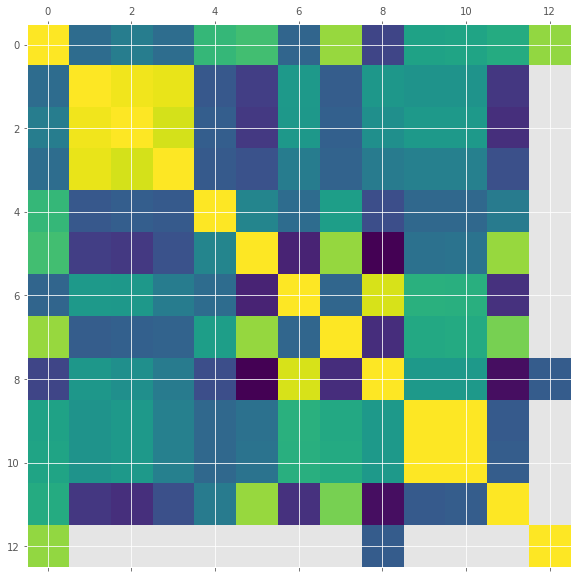

In [22]:
# criando o grafico
plot_corr(df)

O grafico acima mostra a correlacao de cada variavel com todas as outras. A diagonal em amarelo mostra a correlacao de uma variavel com ela mesma, esta sempre sera a maior possivel.

#+1 forta correlacao positiva

#0 nao ha correlacao

#-1 forte correlacao negativa

Entretanto uma variavel com ela mesma vao ter uma forte correlacoa positiva.

#A analise de correlacao eh importante porque quando for para construir um modelo predictivo

In [23]:
# observacao da correlacao numa tabela. usamos a funcao:
df.corr()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL
ON_STREAM_HRS,1.000000,-0.003092,0.105931,0.002824,0.482779,0.531331,-0.044900,0.763229,-0.229295,0.342031,0.353713,0.405123,0.749544
AVG_DOWNHOLE_PRESSURE,-0.003092,1.000000,0.967826,0.949734,-0.124023,-0.262804,0.283359,-0.095114,0.267649,0.248571,0.245981,-0.296765,NaN
AVG_DOWNHOLE_TEMPERATURE,0.105931,0.967826,1.000000,0.898954,-0.087189,-0.295764,0.274247,-0.076801,0.221986,0.289819,0.287328,-0.343581,NaN
AVG_DP_TUBING,0.002824,0.949734,0.898954,1.000000,-0.110382,-0.162100,0.102476,-0.054496,0.093282,0.126964,0.125475,-0.171882,NaN
AVG_ANNULUS_PRESS,0.482779,-0.124023,-0.087189,-0.110382,1.000000,0.155142,-0.003255,0.316138,-0.178271,-0.025095,-0.028252,0.094019,NaN
AVG_CHOKE_SIZE_P,0.531331,-0.262804,-0.295764,-0.162100,0.155142,1.000000,-0.398607,0.752825,-0.551193,0.029671,0.039699,0.760294,NaN
AVG_WHP_P,-0.044900,0.283359,0.274247,0.102476,-0.003255,-0.398607,1.000000,-0.041366,0.908623,0.430498,0.428589,-0.328853,NaN
AVG_WHT_P,0.763229,-0.095114,-0.076801,-0.054496,0.316138,0.752825,-0.041366,1.000000,-0.349285,0.382194,0.395590,0.683835,NaN
DP_CHOKE_SIZE,-0.229295,0.267649,0.221986,0.093282,-0.178271,-0.551193,0.908623,-0.349285,1.000000,0.287677,0.282177,-0.493600,-0.100106
BORE_OIL_VOL,0.342031,0.248571,0.289819,0.126964,-0.025095,0.029671,0.430498,0.382194,0.287677,1.000000,0.998561,-0.112675,NaN


In [25]:
#Selecao de variaveis preditoras ( feature selection) que afectam a producao
features = ['ON_STREAM_HRS',
 'AVG_DOWNHOLE_PRESSURE',
 'AVG_DOWNHOLE_TEMPERATURE',
 'AVG_DP_TUBING',
 'AVG_ANNULUS_PRESS',
 'AVG_CHOKE_SIZE_P',
 'AVG_WHP_P',
 'AVG_WHT_P',
 'DP_CHOKE_SIZE',
 'BORE_WAT_VOL']

In [27]:
# limpeza dos missing datas 
# agora podemos substituir os nossos missings por -999
df = df.fillna(-999)

In [28]:
# verificando se existem ainda os missings?
df.isnull().values.any()

False

# Irregular data (Outliers)
Outliers - Are data that is distinctively different from other observations. They could be real outliers or mistakes.

Depending on whether the feature is numeric or categorical, we can use different techniques to study its distribution to detect outliers.

1- Histogram/Box Plot - When the feature is numeric, we can use a histogram and box plot to detect outliers. 2 -Descriptive Statistics - Also, for numeric features, the outliers could be too distinct that the box plot can’t visualize them. Instead, we can look at their descriptive statistics. 3 - Bar Chart - When the feature is categorical. We can use a bar chart to learn about its categories and distribution. 4 - Many other techniques can spot outliers as well, such as scatter plot, z-score, and clustering. This article does not cover all of those.

How to deal with outlier?

It highly depends on the dataset and the goal of the project. The methods of handling outliers are somewhat similar to missing data. We either drop or adjust or keep them. We can refer back to the missing data section for possible solutions.

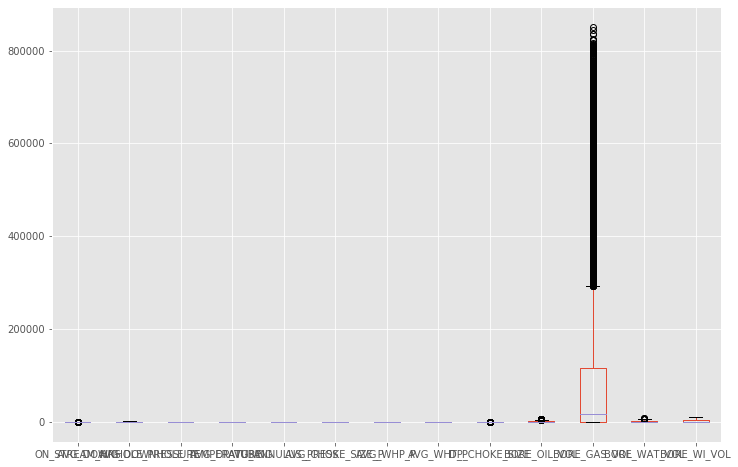

In [29]:
# vamos demostrar o box plot 
df.plot(kind = 'box')

In [30]:
# limpeza dos outliers
frame = {}
for c in features:
    a = df[c].between(df[c].quantile(.02), df[c].quantile(.98)) # this ratio is found by trial and error 0.015 vs 0.0985
    frame[c] =  a                                       #is also ok

In [31]:
for c in features:
    df[c] = df[c][frame[c]]  

In [32]:
df.dropna(inplace=True)
df.shape

(13404, 17)

In [33]:
df_filtered = df

# Plot da producao por furo e injecao 

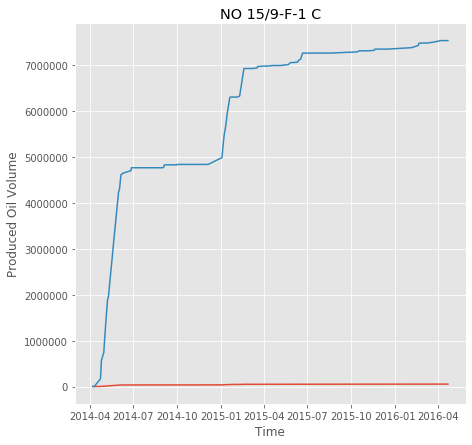

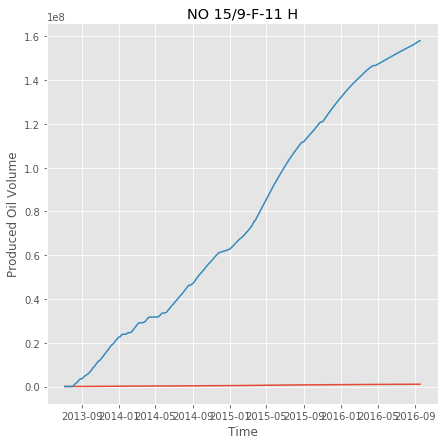

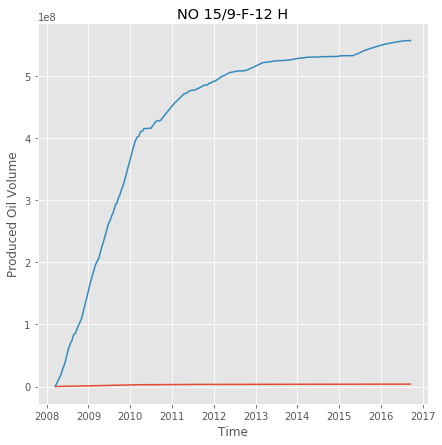

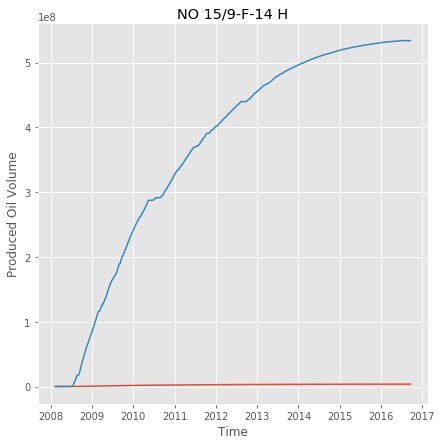

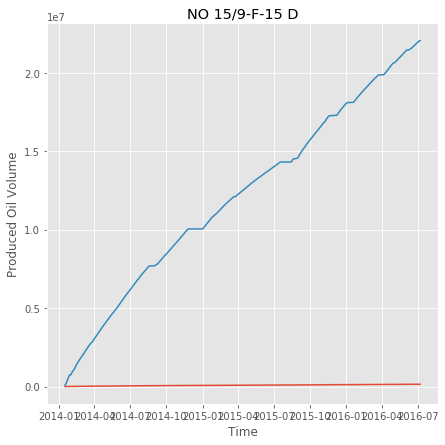

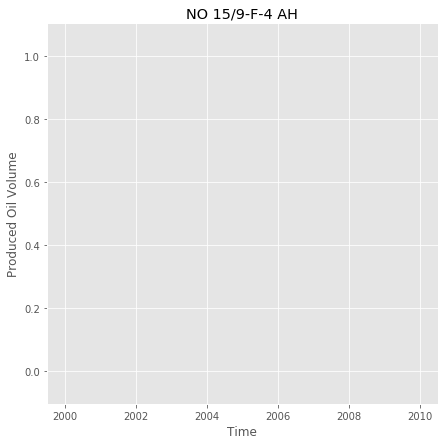

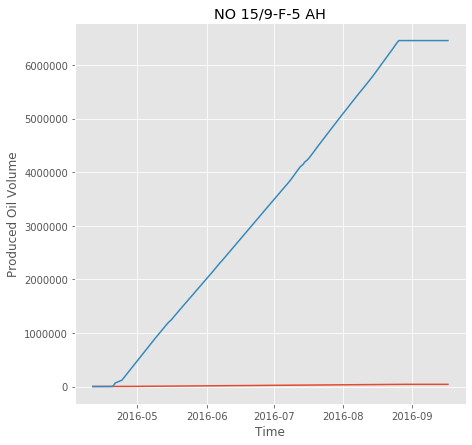

In [34]:
for i in well_list:
    well_df = pd.DataFrame(df_filtered.loc[df_filtered["WELL_BORE_CODE"] == i])
    
    #for bore oil vol, wells must be production wells"
    well_df = well_df[well_df["FLOW_KIND"] == "production"]
    plt.figure(figsize= (7,7))
    plt.title(i)
    plt.ylabel("Produced Oil Volume")
    plt.xlabel("Time")
    #plt.ylim(0,6000) # max producing well is producing 6000 so this value will make comparison of each well better
    plt.plot(well_df["DATEPRD"], well_df["BORE_OIL_VOL"].cumsum())
    plt.plot(well_df["DATEPRD"], well_df["BORE_GAS_VOL"].cumsum())
    plt.show()

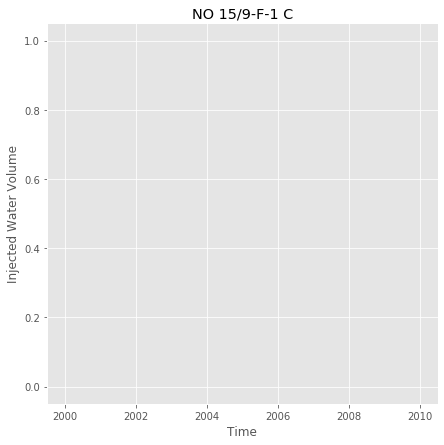

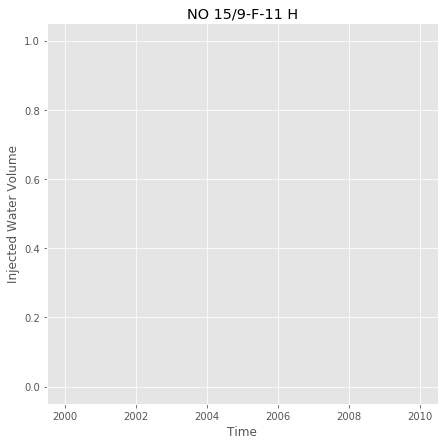

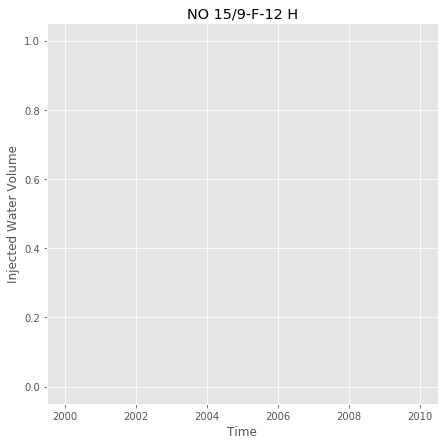

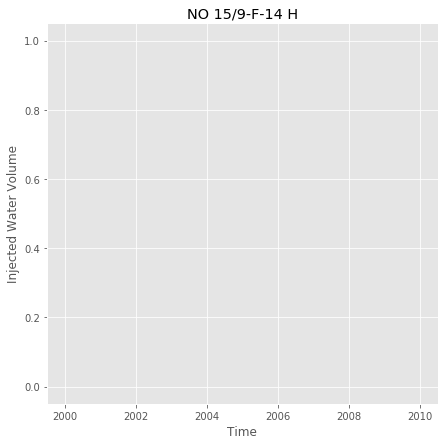

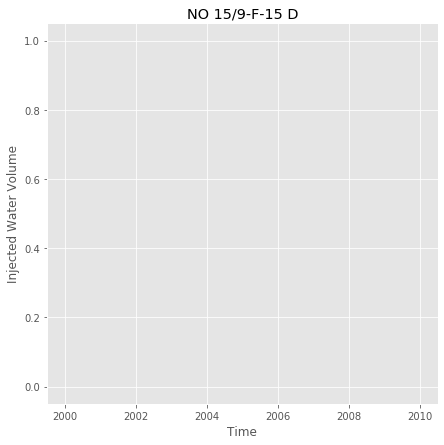

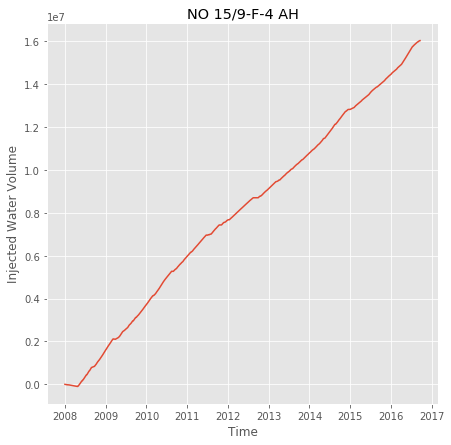

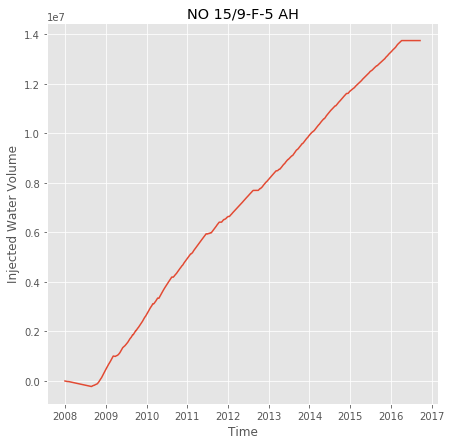

In [35]:
for i in well_list:
    well_df = pd.DataFrame(df_filtered.loc[df_filtered["WELL_BORE_CODE"] == i])
    
    #for bore oil vol, wells must be production wells"
    well_df = well_df[well_df["FLOW_KIND"] == "injection"]
    plt.figure(figsize= (7,7))
    plt.title(i)
    plt.ylabel("Injected Water Volume")
    plt.xlabel("Time")
    #plt.ylim(0,6000) # max producing well is producing 6000 so this value will make comparison of each well better
    plt.plot(well_df["DATEPRD"], well_df["BORE_WI_VOL"].cumsum())
    plt.show()

# MANCHINE LEARNING

In [94]:
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import decomposition

well_df = pd.DataFrame(df_filtered.loc[df["WELL_BORE_CODE"] == well_list[1]])

target = "BORE_GAS_VOL"
features = ['ON_STREAM_HRS',
 'AVG_DOWNHOLE_PRESSURE',
 'AVG_DOWNHOLE_TEMPERATURE',
 'AVG_DP_TUBING',
 'AVG_ANNULUS_PRESS',
 'AVG_CHOKE_SIZE_P',
 'AVG_WHP_P',
 'AVG_WHT_P',
 'DP_CHOKE_SIZE',
 'BORE_WAT_VOL']

X_train, X_test, y_train, y_test = train_test_split(well_df[features]
            ,well_df[target], test_size=0.2, random_state=0)

In [96]:
# Linearidade

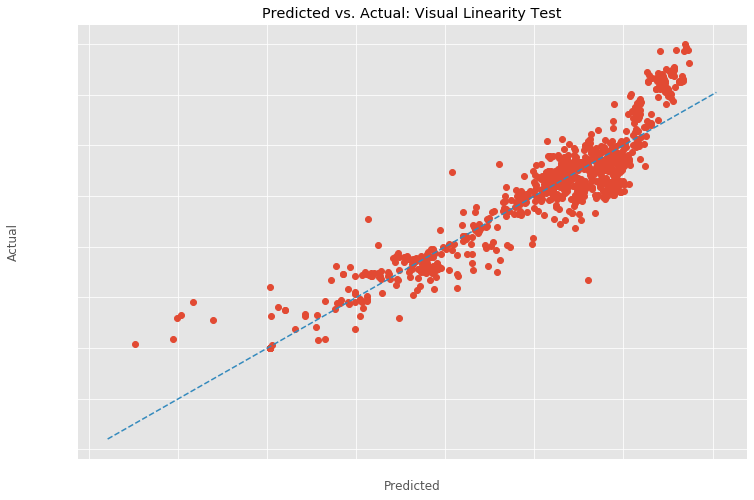

In [95]:
from scipy import stats
from statsmodels.regression.linear_model import OLS 
import statsmodels as sm

y = y_train
X_train_np = np.array(X_train)
y_np = np.array(y)

def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
 #fit an OLS model to data

model = OLS(y_np,sm.tools.add_constant(X_train_np))
results = model.fit()
#predict y values for training data
y_hat = model.predict(results.params)
#plot predicted vs actual
plt.plot(y_hat,y_np,'o')
plt.xlabel('Predicted')#,color='white')
plt.ylabel('Actual')#,color='white')
plt.title('Predicted vs. Actual: Visual Linearity Test')#,color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
abline(1,0)
plt.show()

# Multiple Linear Regressions

In [100]:
corr_matrix = well_df[features].corr().abs()

corr_matrix

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_WAT_VOL
ON_STREAM_HRS,1.000000,0.473440,0.661790,0.512312,0.403615,0.219845,0.028534,0.613170,0.079657,0.246156
AVG_DOWNHOLE_PRESSURE,0.473440,1.000000,0.825501,0.803622,0.377568,0.143934,0.474324,0.348786,0.380373,0.108060
AVG_DOWNHOLE_TEMPERATURE,0.661790,0.825501,1.000000,0.722326,0.391920,0.108505,0.298584,0.633486,0.148314,0.115854
AVG_DP_TUBING,0.512312,0.803622,0.722326,1.000000,0.355676,0.642808,0.140753,0.708936,0.236472,0.649267
AVG_ANNULUS_PRESS,0.403615,0.377568,0.391920,0.355676,1.000000,0.079132,0.101714,0.304665,0.056499,0.046614
AVG_CHOKE_SIZE_P,0.219845,0.143934,0.108505,0.642808,0.079132,1.000000,0.709234,0.640984,0.724267,0.955683
AVG_WHP_P,0.028534,0.474324,0.298584,0.140753,0.101714,0.709234,1.000000,0.470520,0.985827,0.779232
AVG_WHT_P,0.613170,0.348786,0.633486,0.708936,0.304665,0.640984,0.470520,1.000000,0.584459,0.702972
DP_CHOKE_SIZE,0.079657,0.380373,0.148314,0.236472,0.056499,0.724267,0.985827,0.584459,1.000000,0.802400
BORE_WAT_VOL,0.246156,0.108060,0.115854,0.649267,0.046614,0.955683,0.779232,0.702972,0.802400,1.000000


In [101]:
corr_matrix = well_df[features].corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

well_df = well_df.drop(well_df[to_drop], axis=1)

In [103]:
well_df = pd.DataFrame(df_filtered.loc[df_filtered["WELL_BORE_CODE"] == well_list[0]])

target = "BORE_GAS_VOL"
features = ['ON_STREAM_HRS',
 'AVG_DOWNHOLE_PRESSURE',
 'AVG_DOWNHOLE_TEMPERATURE',
 'AVG_DP_TUBING',
 'AVG_ANNULUS_PRESS',
 'AVG_CHOKE_SIZE_P',
 'AVG_WHP_P',
 'AVG_WHT_P',
 'DP_CHOKE_SIZE',
 'BORE_WAT_VOL']

X_train, X_test, y_train, y_test = train_test_split(well_df[features]
            ,well_df[target], test_size=0.2, random_state=0)

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

model = linear_model.Ridge()
model.fit(X_train, y_train)

coeff_df = pd.DataFrame(model.coef_, X_train.columns, columns=['Coefficient'])
print(coeff_df)

y_pred = model.predict(X_test)

result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(result_df.head(10))

                          Coefficient
ON_STREAM_HRS             3170.695820
AVG_DOWNHOLE_PRESSURE       46.233540
AVG_DOWNHOLE_TEMPERATURE    37.464704
AVG_DP_TUBING              -83.452068
AVG_ANNULUS_PRESS           27.165110
AVG_CHOKE_SIZE_P           -56.763292
AVG_WHP_P                  129.685608
AVG_WHT_P                  751.750767
DP_CHOKE_SIZE              207.314533
BORE_WAT_VOL               -71.226255
        Actual      Predicted
367       0.00    8406.687192
684   47840.20   50619.093086
536       0.00    6274.759002
242       0.00   79266.237889
576       0.00   11600.166939
419       0.00    7760.148927
80    55419.55   72537.998074
275   84034.22   71775.047785
240       0.00   -5083.605926
24   174608.88  114186.014967


# Comparacao do fluxo actual e do fluxo previsto

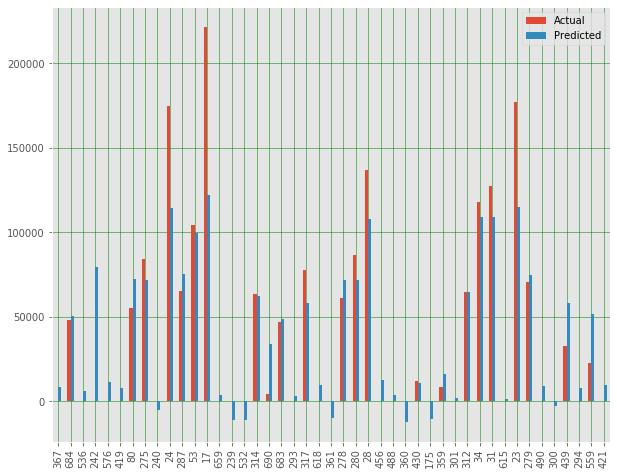

In [105]:
result_df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Alguns dados de producao mostra,-se abaixo de zero o que representa valores irrealisticos no que concerne a producao, pelo que,
estes devem ser revistos.